In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.neighbors as nn
from PIL import Image, ImageOps
from matplotlib.pyplot import imshow, imsave
from skimage.color import lab2rgb, rgb2lab

In [3]:
def load_and_resize_image(image_path, target_size=None) -> Image:
    '''
    # Returns
    # The loaded and resized PIL image
    '''
    img = Image.open(image_path)

    if target_size is None:
        return img
    else:
        return ImageOps.fit(img, target_size, Image.ANTIALIAS)
    
def quantize(inputs, to_points):
    neighbors = nn.NearestNeighbors(n_neighbors=1, algorithm='auto').fit(to_points)
    distances, indices = neighbors.kneighbors(inputs)
    end_points = np.array([to_points[i][0] for i in indices])
    return end_points

In [4]:
# Load the points
pts_in_hull = np.load('resources/pts_in_hull.npy')

In [6]:
image = load_and_resize_image('input.jpg', target_size=(512, 512))
lab_image = rgb2lab(image)
l_channel = lab_image[:, :, 0]
ab_channels = lab_image[:, :, 1:]
quantized = quantize(ab_channels.reshape(-1,2), pts_in_hull)
quantized = quantized.reshape((512, 512, 2))

In [9]:
original_image = lab2rgb(lab_image)

converted_image = np.zeros((512, 512, 3))
converted_image[:, :, 0] = l_channel
converted_image[:, :, 1:] = quantized
converted_image = lab2rgb(converted_image)

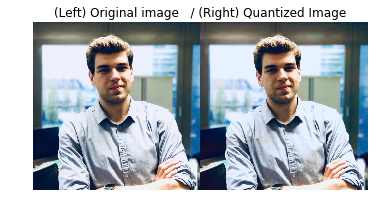

In [10]:
#imshow(converted_image)
plt.imshow(np.hstack((original_image, converted_image)))
plt.title('(Left) Original image   / (Right) Quantized Image')
plt.axis('off');